# 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
aerial = mpimg.imread("C:/Users/kamuj/Downloads/ivp/ivp assignment4/5.1.10.tiff")
airplane = mpimg.imread("C:/Users/kamuj/Downloads/ivp/ivp assignment4/5.1.11.tiff")
clock = mpimg.imread("C:/Users/kamuj/Downloads/ivp/ivp assignment4/5.1.12.tiff")

MSE Loss and PSNR Loss

In [2]:
def mse(image1, image2):
    return np.mean((image1 - image2)**2)

def psnr(image1, image2):
    mse_val = mse(image1, image2)
    return 20 * np.log10(255 / np.sqrt(mse_val))

MSSIM Index and SSIM Map

In [3]:
def convolve2d(image, kernel):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    output_height = image_height - kernel_height + 1
    output_width = image_width - kernel_width + 1
    output = np.zeros((output_height, output_width))
    for i in range(output_height):
        for j in range(output_width):
            roi = image[i:i+kernel_height, j:j+kernel_width]
            output[i, j] = np.sum(np.multiply(roi, kernel))   
    return output

def gaussian(window_size, sigma):
    gauss = np.zeros((window_size, window_size), dtype=np.float32)
    center = window_size // 2

    for i in range(window_size):
        for j in range(window_size):
            gauss[i, j] = np.exp(-((i - center)**2 + (j - center)**2) / (2 * sigma**2))
    
    return gauss / np.sum(gauss)

In [4]:
import cv2
def mean_shift(image):
    distorted_image = np.clip(image.astype(np.float32) + 8, 0, 255).astype(np.uint8)
    return distorted_image

def add_awgn(image, sigma=16):
    noise = np.random.normal(0, sigma, image.shape)
    distorted_image = np.clip(image.astype(np.float32) + noise, 0, 255).astype(np.uint8)
    return distorted_image

def jpeg_compression(image, quality=10):
    _, encoded_image = cv2.imencode('.jpg', image, [int(cv2.IMWRITE_JPEG_QUALITY), quality])
    decoded_image = cv2.imdecode(encoded_image, 1)
    return np.mean(decoded_image,axis = 2)

def gaussian_blur(image, sigma=2):
    window_size = 11
    half_size = window_size // 2
    kernel = gaussian(window_size, sigma)
    padded_image = np.pad(image, ((half_size, half_size), (half_size, half_size)), mode='constant')
    blurred_image = convolve2d(padded_image,kernel)
    return blurred_image

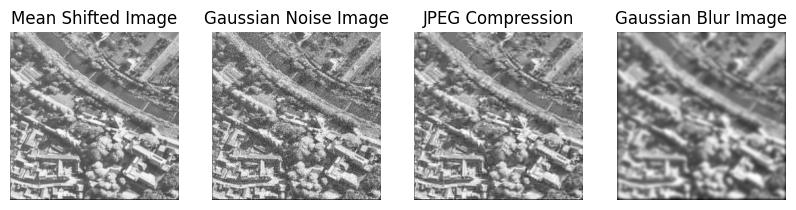

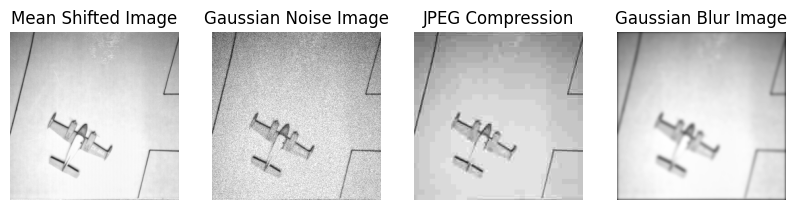

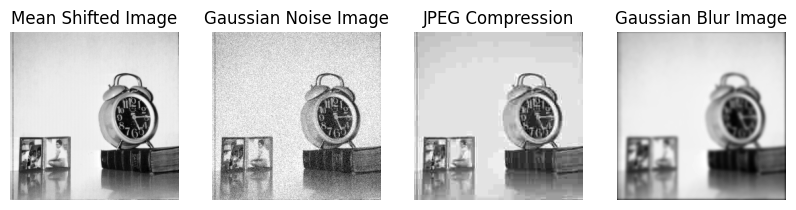

In [5]:
def plots(image):
    image_org = np.copy(image)
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 4, 1)
    mean_image = mean_shift(image)
    plt.imshow(mean_image, cmap = 'gray')
    plt.title("Mean Shifted Image")
    plt.axis('off')
    
    plt.subplot(1, 4, 2)
    awgn = add_awgn(image)
    plt.imshow(awgn, cmap = 'gray')
    plt.title("Gaussian Noise Image")
    plt.axis('off')
    
    plt.subplot(1, 4, 3)
    jpeg_image = jpeg_compression(image)
    plt.imshow(jpeg_image, cmap ='gray')
    plt.title("JPEG Compression")
    plt.axis('off')
    
    plt.subplot(1, 4, 4)
    gauss_image = gaussian_blur(image)
    plt.imshow(gauss_image, cmap = 'gray')
    plt.title("Gaussian Blur Image")
    plt.axis('off')
    
    return mean_image, awgn, jpeg_image, gauss_image
    
mean1, awgn1, jpeg1, gauss1 = plots(aerial)
mean2, awgn2, jpeg2, gauss2 = plots(airplane)
mean3, awgn3, jpeg3, gauss3 = plots(clock)

In [6]:
myrating = [0.95,0.9,0.9,0.6,0.95,0.45,0.45,0.4,0.9,0.45,0.7,0.8]

In [7]:
def ssim_info(img1, img2, window_size=11, sigma=1.5, k1=0.01, k2=0.03):
    # Convert images to float32
    img1 = img1.astype(np.float32)
    img2 = img2.astype(np.float32)

    # Create Gaussian kernel
    gauss = gaussian(window_size, sigma)

    # Calculate constants
    c1 = (k1 * 255)**2
    c2 = (k2 * 255)**2
    c3 = c2/2

    # Perform convolution
    mu1 = convolve2d(img1, gauss)
    mu2 = convolve2d(img2, gauss)
    var1 = convolve2d(img1**2, gauss) - mu1**2
    var2 = convolve2d(img2**2, gauss) - mu2**2
    var12 = convolve2d(img1 * img2, gauss) - mu1 * mu2
    
    luminosity = (2 * mu1 * mu2 + c1) / (mu1**2 + mu2**2 + c1)
    contrast = ((2*var1* var2 + c2) / (var1 + var2 + c2))
    structure = ((var12 + c3) / (var1* var2 + c3))

    # Calculate SSIM
    ssim_map = luminosity * contrast * structure
    ssim_index = np.mean(ssim_map)

    return ssim_index, ssim_map
mse_list = []
psnr_list = []
ssim_list = []

list of ssim values are [0.9981611999196548, 0.7576634638567442, 0.7907435865196676, 0.599240866967057, 0.9991297531402757, 0.30375271963861955, 0.8605049910797392, 0.8926877241862406, 0.9984422621576996, 0.4238264995059008, 0.8791496967256955, 0.8290303393097448]
list of psnr values are [30.069019400448997, 29.06594852461811, 24.851182602715483, 21.095275664528973, 30.069003868840234, 29.099328072978686, 31.539966007231477, 25.365166505950643, 30.069003868840234, 29.0573993241363, 28.76746392416356, 22.713295224502573]
list of mse values are [63.99977111816406, 80.6279296875, 212.7953338623047, 505.3040678049401, 64.0, 80.01060485839844, 45.61248779296875, 189.04435357456498, 64.0, 80.78680419921875, 86.36424255371094, 348.1375257503239]


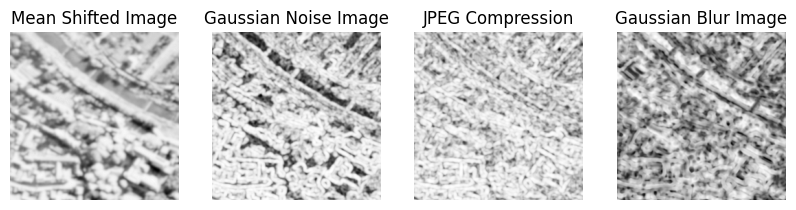

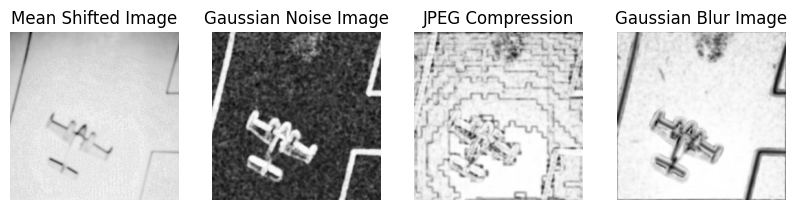

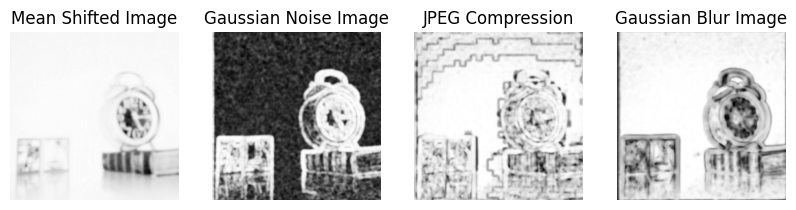

In [8]:
def plots2(image):
    image_org = np.copy(image)
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 4, 1)
    mean_image = mean_shift(image)
    m_ind,m_map = ssim_info(image, mean_image)
    ssim_list.append(m_ind)
    psnr_list.append(psnr(image, mean_image))
    mse_list.append(mse(image, mean_image))
    plt.imshow(m_map, cmap = 'gray')
    plt.title("Mean Shifted Image")
    plt.axis('off')
    
    plt.subplot(1, 4, 2)
    awgn = add_awgn(image)
    a_ind,a_map = ssim_info(image, awgn)
    ssim_list.append(a_ind)
    psnr_list.append(psnr(image, awgn))
    mse_list.append(mse(image, awgn))
    plt.imshow(a_map, cmap = 'gray')
    plt.title("Gaussian Noise Image")
    plt.axis('off')
    
    plt.subplot(1, 4, 3)
    jpeg_image = jpeg_compression(image)
    j_ind,j_map = ssim_info(image, jpeg_image)
    ssim_list.append(j_ind)
    psnr_list.append(psnr(image, jpeg_image))
    mse_list.append(mse(image, jpeg_image))
    plt.imshow(j_map, cmap ='gray')
    plt.title("JPEG Compression")
    plt.axis('off')
    
    plt.subplot(1, 4, 4)
    gauss_image = gaussian_blur(image)
    g_ind,g_map = ssim_info(image, gauss_image)
    ssim_list.append(g_ind)
    psnr_list.append(psnr(image, gauss_image))
    mse_list.append(mse(image, gauss_image))
    plt.imshow(g_map, cmap = 'gray')
    plt.title("Gaussian Blur Image")
    plt.axis('off')
    return 
    
plots2(aerial)
plots2(airplane)
plots2(clock)
print("list of ssim values are", ssim_list)
print("list of psnr values are", psnr_list)
print("list of mse values are", mse_list)

In [9]:
array1 = np.array(myrating)
array2 = np.array(ssim_list)
array3 = np.array(psnr_list)

print("Correlation for my subjective ratings and ssim_list is", np.corrcoef(array1, array2)[0,1])
print("Correlation for my subjective ratings and psnr_list is", np.corrcoef(array1, array3)[0,1])

Correlation for my subjective ratings and ssim_list is 0.5942581174857077
Correlation for my subjective ratings and psnr_list is 0.07146278372919417


We can conclude that ssim is rating close to my personal values than psnr. so ssim is the better rating compared to others

# 2

In [10]:
light_house = cv2.imread("C:/Users/kamuj/Downloads/ivp/ivp assignment4/lighthouse.png", cv2.IMREAD_GRAYSCALE)

In [11]:
template = cv2.imread("C:/Users/kamuj/Downloads/ivp/ivp assignment4/template.png", cv2.IMREAD_GRAYSCALE)

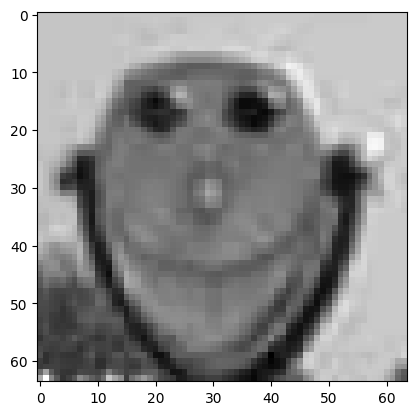

In [12]:
plt.imshow(template, cmap = 'gray')

In [13]:
def centered_2d_differencing(image):
    kernel_dx = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
    kernel_dy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    dx = convolve2d(image, kernel_dx)
    dy = convolve2d(image, kernel_dy)

    return dx, dy

def roberts_operator(image):
    kernel_dx = np.array([[1, 0], [0, -1]])
    kernel_dy = np.array([[0, 1], [-1, 0]])
    dx = convolve2d(image, kernel_dx)
    dy = convolve2d(image, kernel_dy)

    return dx, dy

def prewitt_operator(image):
    kernel_dx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    kernel_dy = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
    dx = convolve2d(image, kernel_dx)
    dy = convolve2d(image, kernel_dy)

    return dx, dy

def sobel_operator(image):
    kernel_dx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    kernel_dy = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    dx = convolve2d(image, kernel_dx)
    dy = convolve2d(image, kernel_dy)

    return dx, dy

def gradient_magnitude(dx, dy, method='a'):
    if method == 'a':
        magnitude = np.sqrt(dx**2 + dy**2)
    elif method == 'b':
        magnitude = np.abs(dx) + np.abs(dy)
    elif method == 'c':
        magnitude = np.maximum(np.abs(dx), np.abs(dy))
    return magnitude

def threshold_edge_map(magnitude_map, threshold):
    edge_map = np.zeros_like(magnitude_map, dtype=np.uint8)
    edge_map[magnitude_map > threshold] = 1
    return edge_map

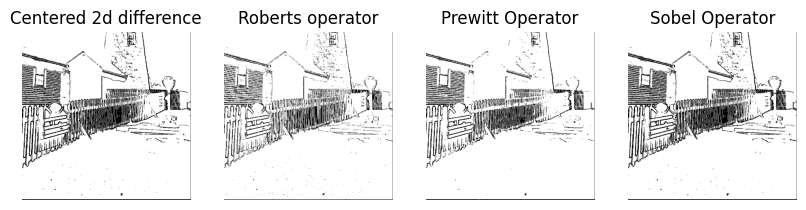

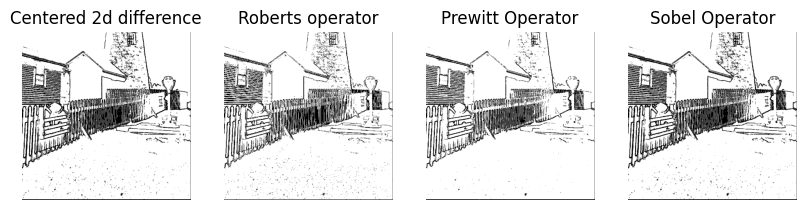

In [14]:
def plots3(image, given,threshold1,threshold2,threshold3,threshold4):
    dx, dy = centered_2d_differencing(image)    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 4, 1)
    plt.title("Centered 2d difference")
    magnitude_map = gradient_magnitude(dx, dy, method=given)
    edge_map = threshold_edge_map(magnitude_map, threshold1)
    plt.imshow(edge_map, cmap='binary')
    plt.axis('off')
    
    dx, dy = roberts_operator(image)
    plt.subplot(1, 4, 2)
    plt.title("Roberts operator")
    magnitude_map = gradient_magnitude(dx, dy, method=given)
    edge_map = threshold_edge_map(magnitude_map, threshold2)
    plt.imshow(edge_map, cmap='binary')
    plt.axis('off')
    
    dx, dy = prewitt_operator(image)
    plt.subplot(1, 4, 3)
    plt.title("Prewitt Operator")
    magnitude_map = gradient_magnitude(dx, dy, method=given)
    edge_map = threshold_edge_map(magnitude_map, threshold3)
    plt.imshow(edge_map, cmap='binary')
    plt.axis('off')
    
    dx, dy = sobel_operator(image)
    plt.subplot(1, 4, 4)
    plt.title("Sobel Operator")
    magnitude_map = gradient_magnitude(dx, dy, method=given)
    edge_map = threshold_edge_map(magnitude_map, threshold4)
    plt.imshow(edge_map, cmap='binary')
    plt.axis('off')
    plt.show()
    
plots3(light_house, 'a',125,30,120, 125)
plots3(light_house, 'b',125,30,120, 125)
plots3(light_house, 'c',125,30,120, 125)

2.2

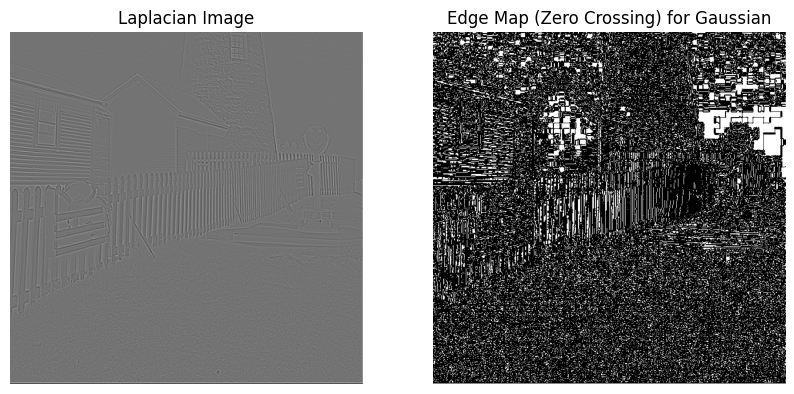

In [15]:
def laplacian_operator(image):
    # Define Laplacian kernel
    kernel = np.array([[0, 1, 0],
                       [1, -4, 1],
                       [0, 1, 0]])
    laplacian_image = convolve2d(image, kernel)

    return laplacian_image

def zero_crossing_detector(laplacian):
    edge_map = np.zeros_like(laplacian, dtype=np.uint8)
    M, N = laplacian.shape
    for i in range(M):
        for j in range(N):
            if laplacian[i][j] != 0:
                if i > 0:
                    if laplacian[i][j] * laplacian[i-1][j] < 0:
                        edge_map[i][j] = 1
                if j > 0:
                    if laplacian[i][j] * laplacian[i][j-1] < 0:
                        edge_map[i][j] = 1
                if i < M-1:
                    if laplacian[i][j] * laplacian[i+1][j] < 0:
                        edge_map[i][j] = 1
                if j < N-1:
                    if laplacian[i][j] * laplacian[i][j+1] < 0:
                        edge_map[i][j] = 1
            else:
                # If there exists a previous and next pixel
                if i > 0 and i < M-1:
                    if laplacian[i-1][j] * laplacian[i+1][j] < 0:
                        edge_map[i][j] = 1

                if j > 0 and j < N-1:
                    if laplacian[i][j-1] * laplacian[i][j+1] < 0:
                        edge_map[i][j] = 1

    return edge_map

image = light_house
laplacian_image = laplacian_operator(image)
edge_map = zero_crossing_detector(laplacian_image)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(laplacian_image, cmap='gray')
plt.title('Laplacian Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edge_map, cmap='binary')
plt.title('Edge Map (Zero Crossing) for Gaussian')
plt.axis('off')

plt.show()


2.3

In [16]:
def gaussian_filter_2d(image, sigma):
    kernel_size = 11
    kernel = np.exp(-(np.arange(-kernel_size // 2, kernel_size // 2 + 1) ** 2) / (2 * sigma ** 2))
    kernel /= np.sum(kernel)
    smoothed_image = np.apply_along_axis(lambda m: np.convolve(m, kernel, mode='same'), axis=0, arr=image)
    smoothed_image = np.apply_along_axis(lambda m: np.convolve(m, kernel, mode='same'), axis=1, arr=smoothed_image)

    return smoothed_image


def laplacian_of_gaussian(image, sigma):
    smoothed_image = gaussian_filter_2d(image, sigma)
    laplacian = convolve2d(smoothed_image, np.array([[0, 1, 0],
                                                    [1, -4, 1],
                                                    [0, 1, 0]]))

    return laplacian


def zero_crossing_detector(laplacian):
    # Initialize edge map
    edge_map = np.zeros_like(laplacian, dtype=np.uint8)

    M, N = laplacian.shape

    # Detecting zero crossings
    for i in range(M):
        for j in range(N):
            if laplacian[i][j] != 0:
                # Detecting adjacent pixels
                if i > 0:
                    if laplacian[i][j] * laplacian[i-1][j] < 0:
                        edge_map[i][j] = 1
                if j > 0:
                    if laplacian[i][j] * laplacian[i][j-1] < 0:
                        edge_map[i][j] = 1
                if i < M-1:
                    if laplacian[i][j] * laplacian[i+1][j] < 0:
                        edge_map[i][j] = 1
                if j < N-1:
                    if laplacian[i][j] * laplacian[i][j+1] < 0:
                        edge_map[i][j] = 1
            else:
                # If there exists a previous and next pixel
                if i > 0 and i < M-1:
                    if laplacian[i-1][j] * laplacian[i+1][j] < 0:
                        edge_map[i][j] = 1

                if j > 0 and j < N-1:
                    if laplacian[i][j-1] * laplacian[i][j+1] < 0:
                        edge_map[i][j] = 1

    return edge_map

image = light_house
sigma_gaussian = 2
sigma_log = 2
laplacian_image = laplacian_of_gaussian(image, sigma_log)
edge_map = zero_crossing_detector(laplacian_image)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(laplacian_image, cmap='gray')
plt.title('Laplacian of Gaussian Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edge_map, cmap='binary')
plt.title('Edge Map (Zero Crossing) for LOG')
plt.axis('off')
plt.show()


In [17]:
light_house_corr = add_awgn(light_house, 10)
image = light_house_corr

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(light_house, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')
plt.show()


comparing the edge detections after noisy image

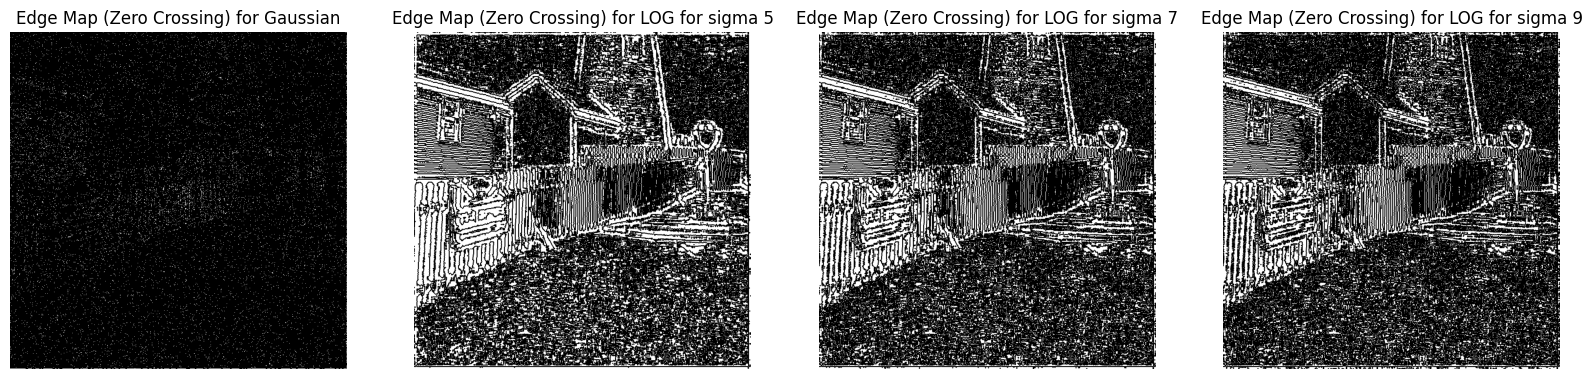

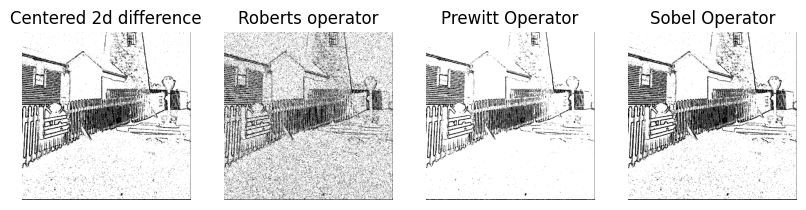

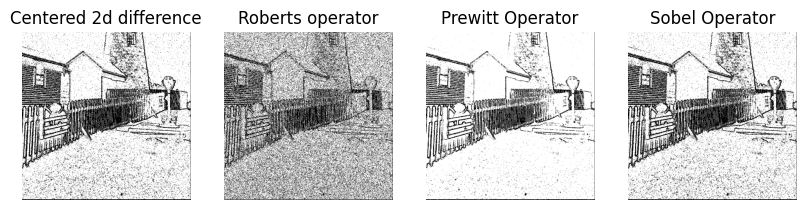

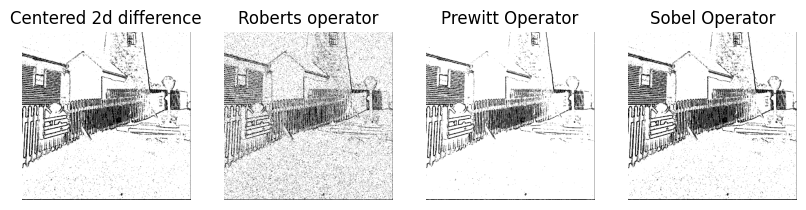

In [18]:
laplacian_image = laplacian_of_gaussian(image, 5)
edge_map2 = zero_crossing_detector(laplacian_image)
laplacian_image = laplacian_of_gaussian(image, 7)
edge_map3 = zero_crossing_detector(laplacian_image)
laplacian_image = laplacian_of_gaussian(image, 9)
edge_map4 = zero_crossing_detector(laplacian_image)
laplacian_image = laplacian_operator(image)
edge_map1 = zero_crossing_detector(laplacian_image)

# Display the results
plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.imshow(edge_map1, cmap='binary')
plt.title('Edge Map (Zero Crossing) for Gaussian')
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(edge_map2, cmap='binary')
plt.title('Edge Map (Zero Crossing) for LOG for sigma 5')
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(edge_map3, cmap='binary')
plt.title('Edge Map (Zero Crossing) for LOG for sigma 7')
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(edge_map4, cmap='binary')
plt.title('Edge Map (Zero Crossing) for LOG for sigma 9')
plt.axis('off')
plt.show()


plots3(light_house_corr, 'a',125,30,120, 125)
plots3(light_house_corr, 'b',125,30,120, 125)
plots3(light_house_corr, 'c',125,30,120, 125)

We can see that LOG is more robust, as the other operators are effected by the noise

# 3

In [38]:
lighthouse = plt.imread("lighthouse.png")
template = plt.imread("template.png")

def normalized_cross_correlation(image, pattern):
    image_height, image_width, channels = image.shape
    pattern_height, pattern_width, channels = pattern.shape
    correlation_map = np.zeros((image_height, image_width))
    pattern_energy = np.sum(pattern ** 2)
    padded_image = np.zeros((image_height + pattern_height - 1, image_width + pattern_width - 1, channels))
    padded_image[pattern_height - 1 : pattern_height - 1 + image_height, pattern_width - 1 : pattern_width - 1 + image_width, :] = image
    
    for y in range(image_height):
        for x in range(image_width):
            patch = padded_image[y : y + pattern_height, x : x + pattern_width, :]
            patch_correlation = np.sum(patch * pattern)
            patch_energy = np.sum(patch ** 2)
            
            if patch_energy > 0 and pattern_energy > 0:
                correlation_map[y, x] = patch_correlation / np.sqrt(patch_energy * pattern_energy)
            else:
                correlation_map[y, x] = 0  # Set correlation to zero if division by zero occurs

    return correlation_map * 255


def detect_matches(correlation, threshold):
    threshold_match = np.where(correlation > threshold)
    threshold_match = list(zip(threshold_match[0], threshold_match[1]))
    return threshold_match

def plots4(lighthouse, template):
    plt.figure(figsize = (15 , 15))
    plt.subplot(1 , 3 , 1)
    plt.imshow(lighthouse , cmap = 'gray')
    plt.title("Image given")
    plt.axis("off")

    plt.subplot(1 , 3 , 2)
    plt.imshow(template , cmap = 'gray')
    plt.title("Template")
    plt.axis("off")

    cc = normalized_cross_correlation(lighthouse , template)
    t = np.floor(cc.max())
    matches = detect_matches(cc , t)

    plt.subplot(1 , 3 , 3)
    plt.imshow(lighthouse, cmap = 'gray')
    plt.title("Detection of Template")

    template_height, template_width = template.shape[:2]

    for match in matches:
        match_y, match_x = match
        plt.plot([match_x for _ in range(10)], np.linspace(match_y - template_height, match_y, 10), 'g-')
        plt.plot([match_x - template_width for _ in range(10)], np.linspace(match_y - template_height, match_y, 10), 'g-')
        plt.plot(np.linspace(match_x - template_width, match_x, 10), [match_y - template_height for _ in range(10)], 'g-')
        plt.plot(np.linspace(match_x - template_width, match_x, 10), [match_y for _ in range(10)], 'g-')

    plt.show()
    print(f"The threshold value is ", t)
    return t

plots4(lighthouse, template)

The threshold value is  255.0


255.0

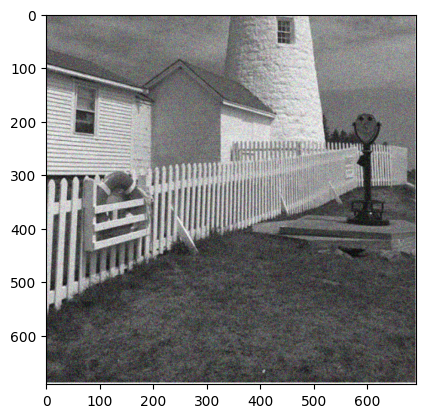

In [67]:
def add_gaussian_noise(image, mean=0, std=25):
    # Generate Gaussian noise for each channel
    std = std/255
    noise = np.random.normal(mean, std, size=image.shape)

    # Add noise to each channel independently
    noisy_image = np.clip(image + noise, 0, 1)  # Clip to [0, 1]

    return noisy_image



The threshold value is  254.0


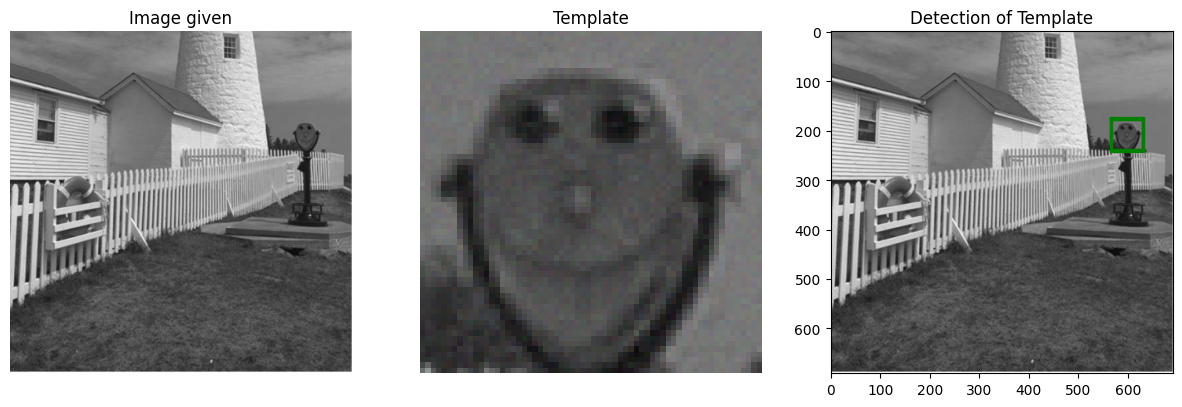

The threshold value is  254.0


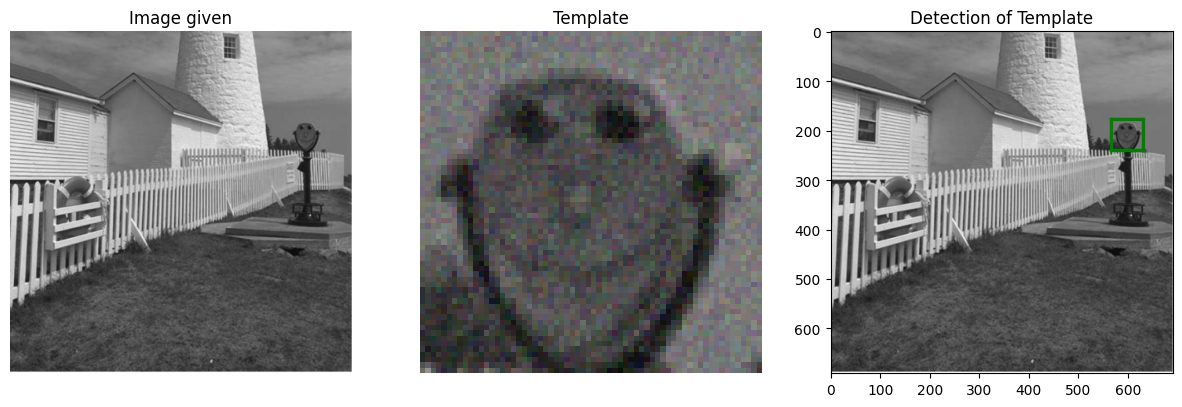

The threshold value is  254.0


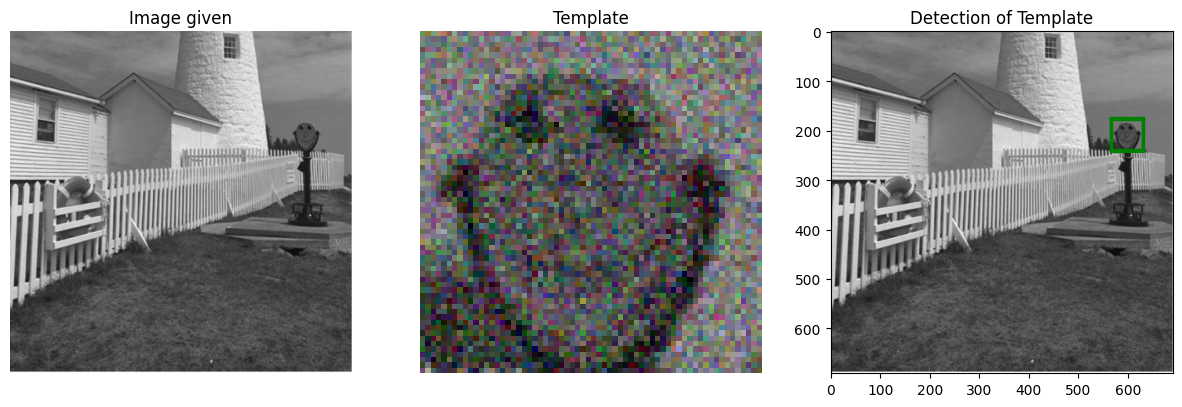

The threshold value is  251.0


251.0

In [72]:
plots4(lighthouse, add_gaussian_noise(template,0,1))
plots4(lighthouse, add_gaussian_noise(template,0,3))
plots4(lighthouse, add_gaussian_noise(template,0,9))
plots4(lighthouse, add_gaussian_noise(template,0,25))

We can see threshold decreases as we add noise

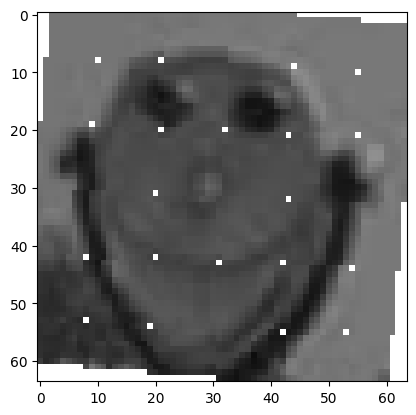

In [74]:
def rotate_image(image, angle):
    # Convert angle to radians
    angle_rad = np.radians(angle)
    h, w = image.shape[:2]
    cos_theta = np.cos(angle_rad)
    sin_theta = np.sin(angle_rad)
    
    # Compute center of the image
    center = (w / 2, h / 2)
    
    # Define the 3x3 rotation matrix
    rotation_matrix = np.array([[cos_theta, -sin_theta, 0],
                                 [sin_theta, cos_theta, 0],
                                 [0, 0, 1]])
    
    rotated_image = np.zeros_like(image)
    
    # Iterate over each pixel in the original image
    for y in range(h):
        for x in range(w):
            # Translate coordinates to center
            translated_coord = np.array([x - center[0], y - center[1], 1])
            rotated_coord = np.dot(rotation_matrix, translated_coord)
            rotated_x = int(rotated_coord[0] + center[0])
            rotated_y = int(rotated_coord[1] + center[1])            
            if 0 <= rotated_x < w and 0 <= rotated_y < h:
                rotated_image[rotated_y, rotated_x] = image[y, x]
    
    return rotated_image

plt.imshow(rotate_image(template, 5))

The threshold value is  248.0


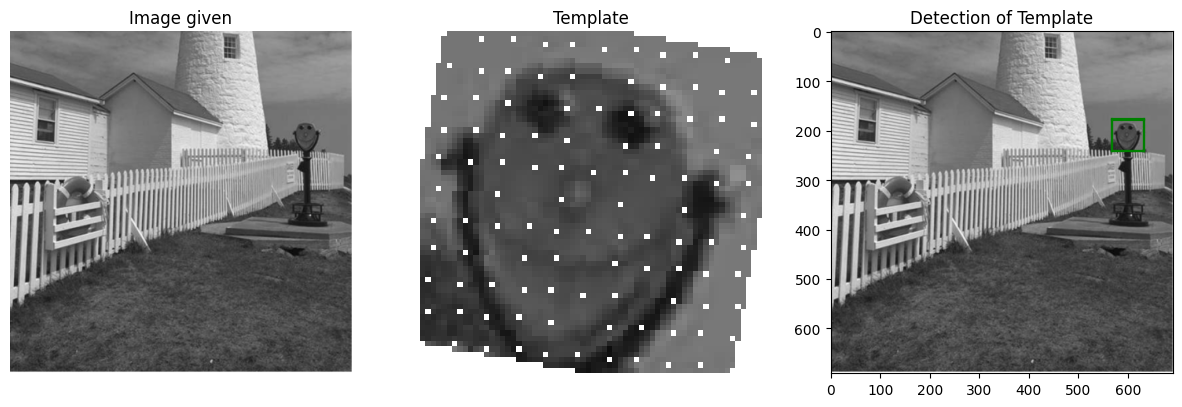

The threshold value is  240.0


The threshold value is  232.0


232.0

In [73]:
plots4(lighthouse,rotate_image(template, 5))
plots4(lighthouse,rotate_image(template, 10))
plots4(lighthouse,rotate_image(template, 15))

We can see threshold decreases as we rotate image and there is descripancy